# MARKETING DESEA DIVIDIR  SUS CLIENTES EN AL MENOS 3 GRUPOS DISTINTOS



# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv("Marketing_data.csv")
# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
creditcard_df.describe()

# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Vamos a investigar quien ha hecho una compra de $40761!
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# Vamos a investigar quien ha hecho una compra de $40761!
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


# TAREA #3: VISUALIZACIÓN DEL DATASET

<AxesSubplot:>

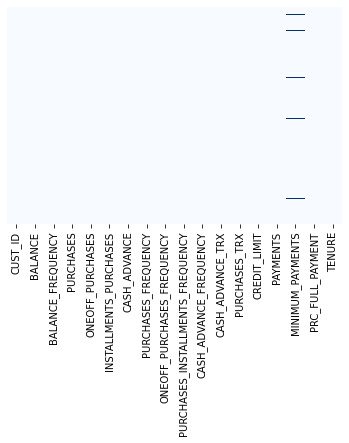

In [8]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

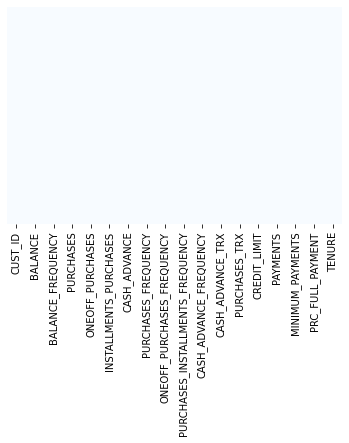

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [13]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
creditcard_df.duplicated().sum()

0

In [14]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(creditcard_df.columns)
n

17

In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

C:\Users\basti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\basti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\basti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

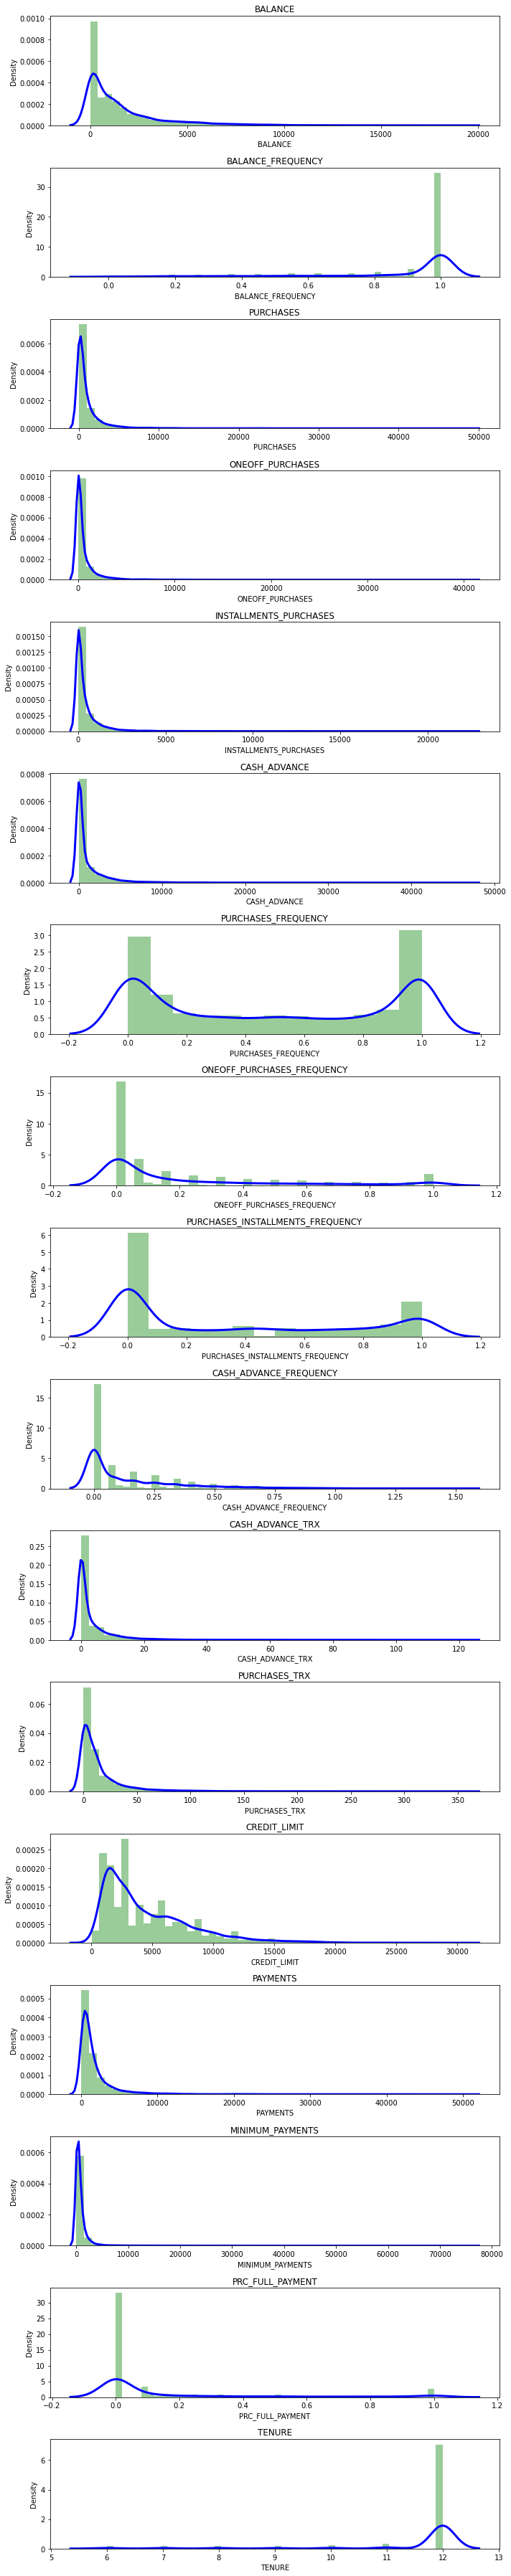

In [18]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [19]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'

In [20]:
correlations = creditcard_df.corr()

<AxesSubplot:>

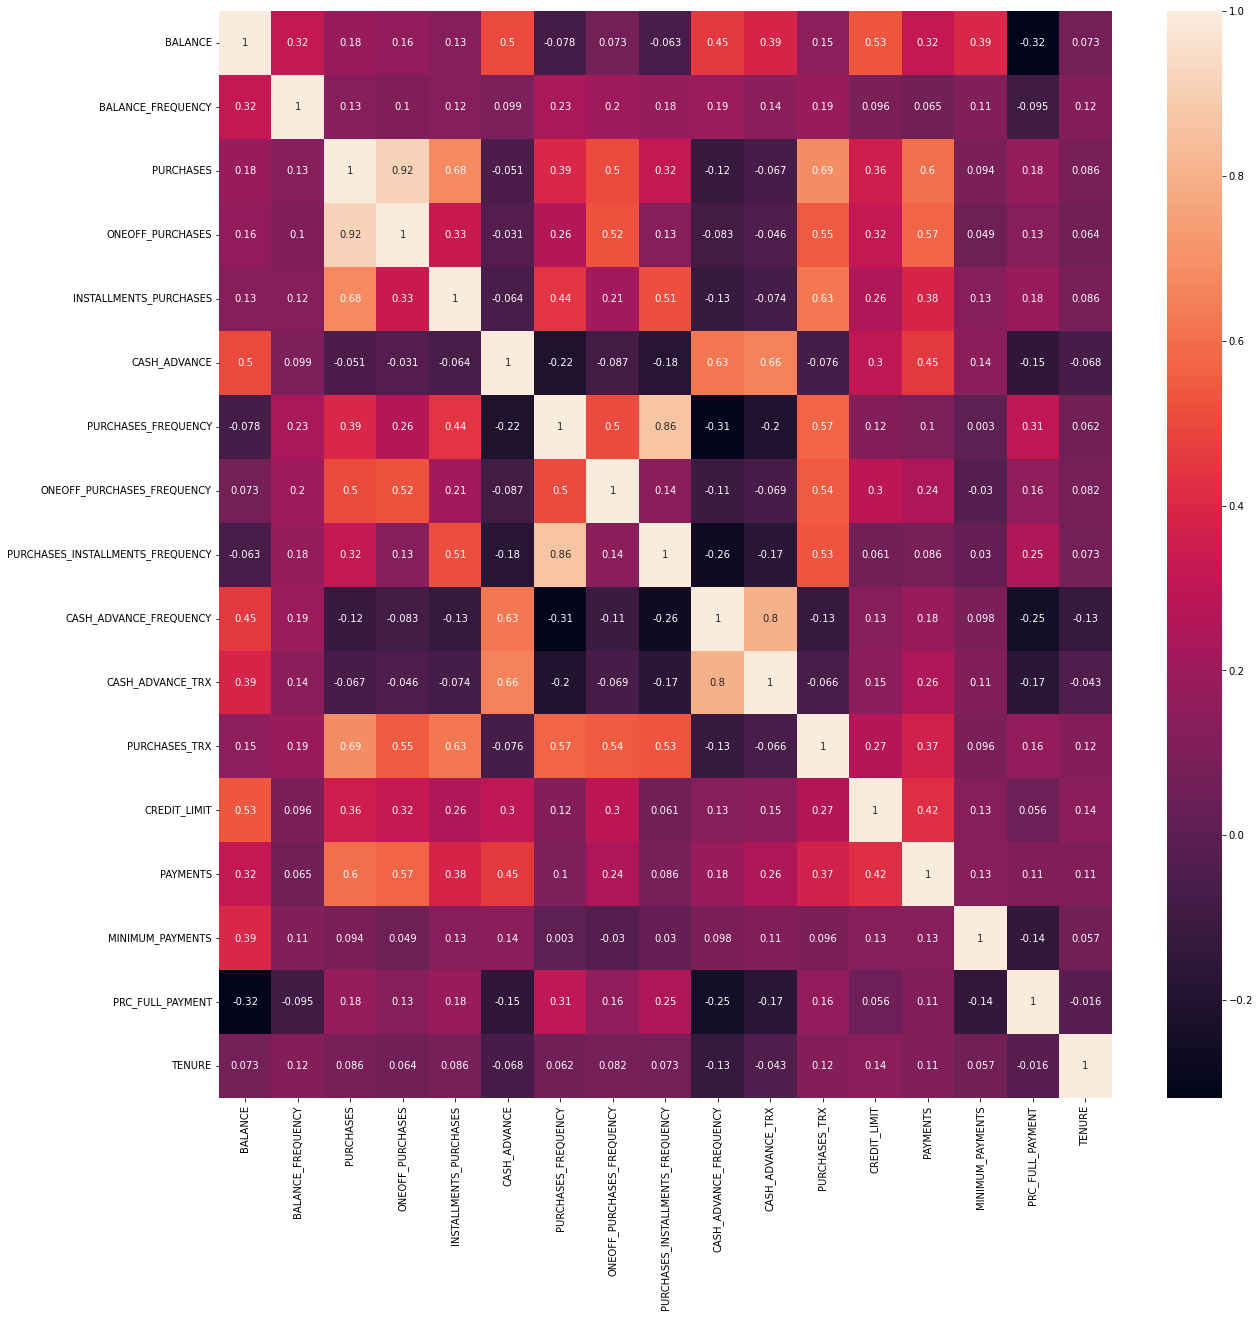

In [21]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

- El método del codo es un método heurístico de interpretación y validación de la coherencia dentro del análisis de clustering diseñado para ayudar a encontrar el número apropiado de clusters en un conjunto de datos.
- Si el gráfico de líneas se parece a un brazo, entonces el "codo" en el brazo es el valor de k que es el mejor.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [22]:
# Empecemos por escalar primero el dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [23]:
creditcard_df_scaled.shape

(8950, 17)

In [24]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

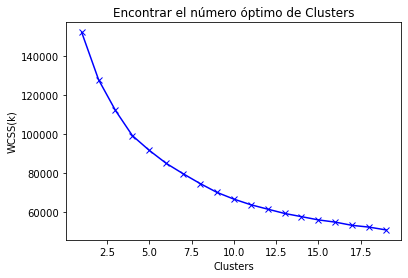

In [25]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()



# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
# Elijamos pues un número de clusters igual a 8.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

In [26]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.177337,0.384287,0.031246,-0.046149,0.158702,-0.316016,0.914295,0.258281,0.799118,-0.367246,-0.305174,0.221041,-0.191475,-0.173720,-0.069417,-0.329964,0.101433
1,1.606300,0.376039,-0.212854,-0.141730,-0.242965,2.006761,-0.459781,-0.164685,-0.431430,1.948739,1.914540,-0.263893,0.994360,0.786957,0.354119,-0.389074,-0.093121
2,-0.695659,-2.179151,-0.326462,-0.241814,-0.327537,-0.299557,-0.584121,-0.447969,-0.466827,-0.472889,-0.351437,-0.436002,-0.243980,-0.228222,-0.252632,0.072197,-0.172284
3,0.745783,0.473225,2.093159,1.744593,1.744121,-0.197981,1.158754,1.755058,1.083227,-0.303517,-0.216507,2.488638,1.159069,1.163563,0.206191,0.255047,0.309146
4,-0.693185,0.097689,0.099790,-0.028774,0.288381,-0.447280,0.902028,0.267269,0.740416,-0.639745,-0.457845,0.181759,0.067838,-0.141909,-0.294863,2.182216,-0.088265
5,1.935719,0.309968,11.992170,11.864696,6.555648,0.215659,1.012697,1.992285,0.894342,-0.403063,-0.137910,4.639822,3.215102,8.634805,1.142543,1.087816,0.303199
6,-0.003076,0.369404,-0.365828,-0.243655,-0.417241,-0.053194,-0.908168,-0.409995,-0.804503,0.179015,0.000392,-0.500789,-0.328888,-0.260865,-0.073630,-0.450605,-0.017026
7,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491


In [29]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (Revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1195.363310,0.968305,1069.962398,515.839303,554.579855,316.170612,0.857301,0.279508,0.682027,0.061655,1.166241,20.204082,3797.786109,1230.241108,702.433419,0.057206,11.653061
1,4907.852806,0.966351,548.440011,357.195055,191.357423,5187.143525,0.305818,0.153329,0.192976,0.525107,16.314159,8.150442,8112.339099,4011.307414,1689.464906,0.039917,11.392699
2,116.519121,0.361050,305.714663,191.076198,114.879569,350.686965,0.255914,0.068820,0.178908,0.040514,0.850528,3.872461,3606.749711,1072.464159,275.459001,0.174831,11.286759
3,3116.759696,0.989373,5475.270490,3488.104574,1988.254846,563.695527,0.955414,0.726025,0.794940,0.074407,1.771325,76.568058,8711.615245,5101.544261,1344.725412,0.228312,11.931034
4,121.669760,0.900412,1216.406710,544.678967,671.847081,40.904110,0.852378,0.282189,0.658698,0.007125,0.124373,19.227683,4741.273366,1322.331551,177.039866,0.791976,11.399198
5,5593.509777,0.950699,26624.661538,20285.402692,6339.258846,1431.118513,0.896795,0.796795,0.719872,0.054487,2.307692,130.038462,16192.307692,26730.059239,3526.854047,0.471882,11.923077
6,1558.072608,0.964779,221.607284,188.020413,33.761432,867.321764,0.125859,0.080148,0.044707,0.170967,3.251499,2.262081,3297.818930,977.966286,692.614830,0.021920,11.494533
7,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407


In [30]:
labels.shape,labels.min(),labels.max()

((8950,), 0, 7)

In [31]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 4, 0, ..., 1, 1, 1])

In [32]:
# Concatenamos las etiquetas de los clusters con el dataset riginal 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


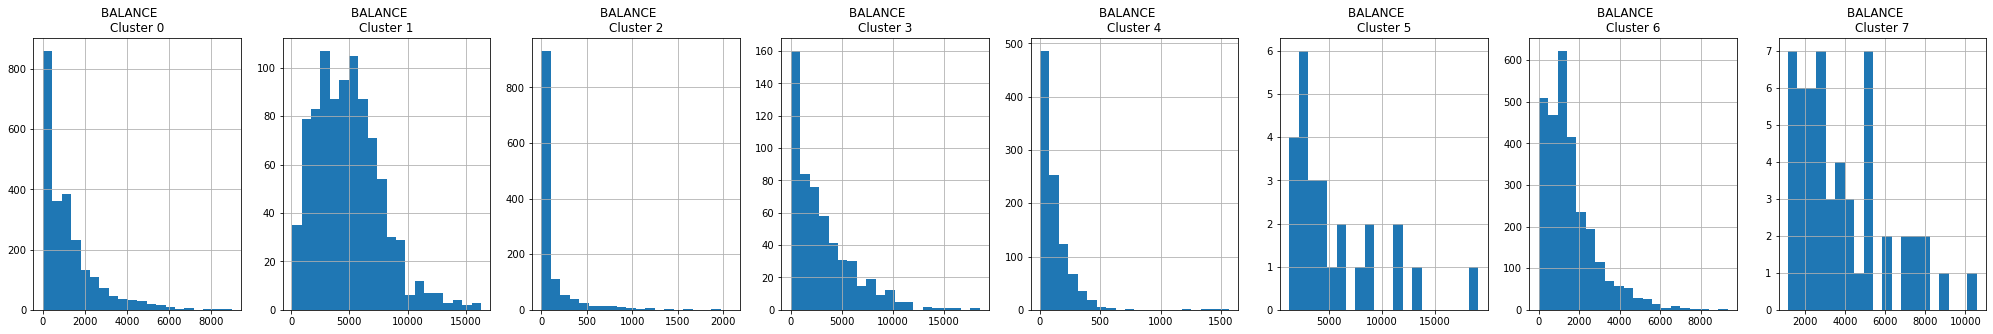

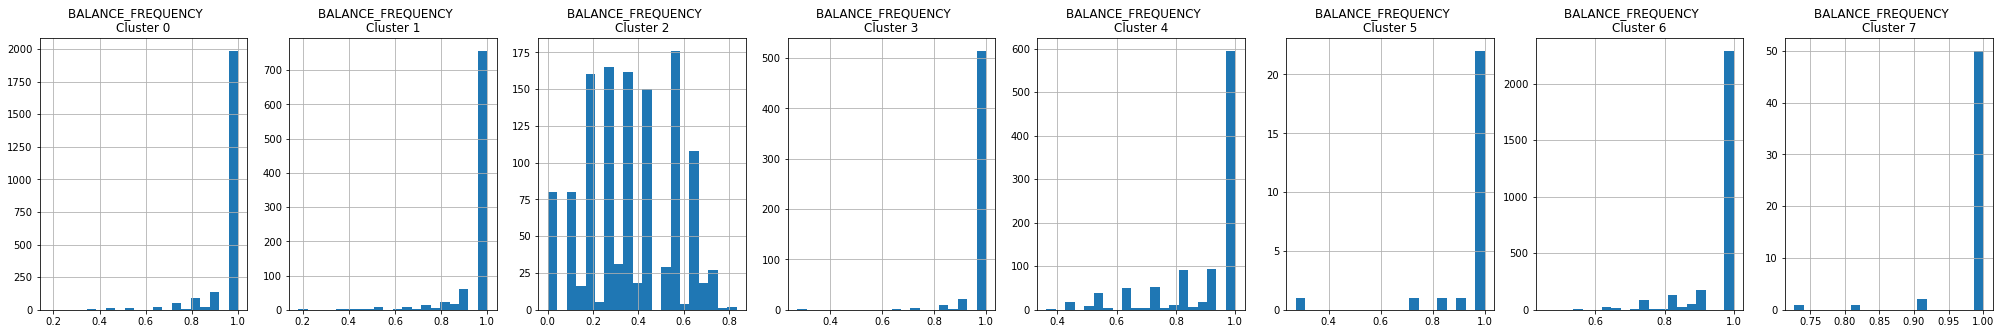

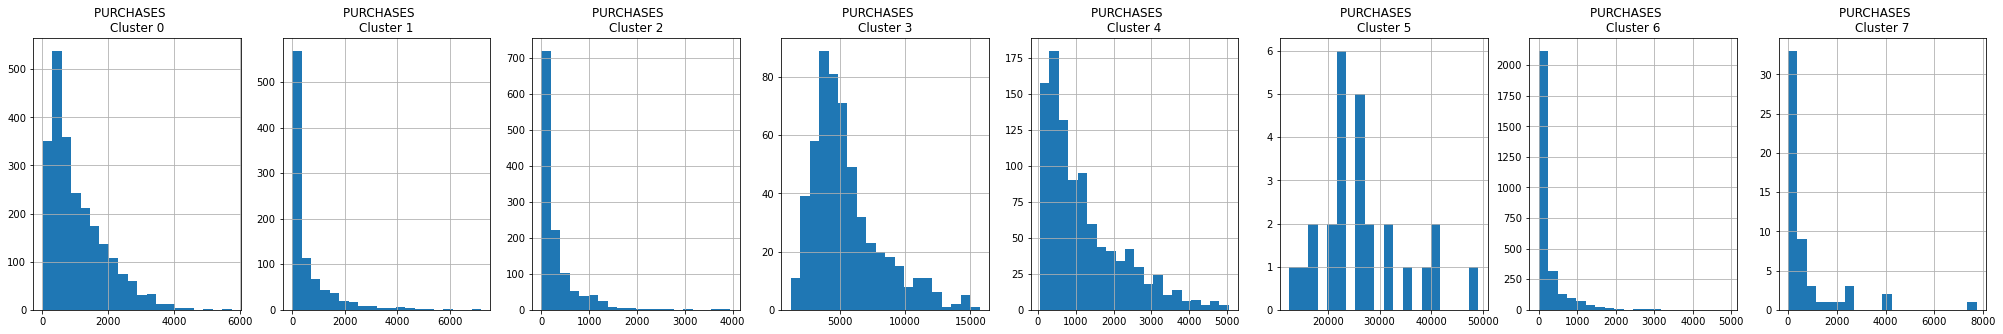

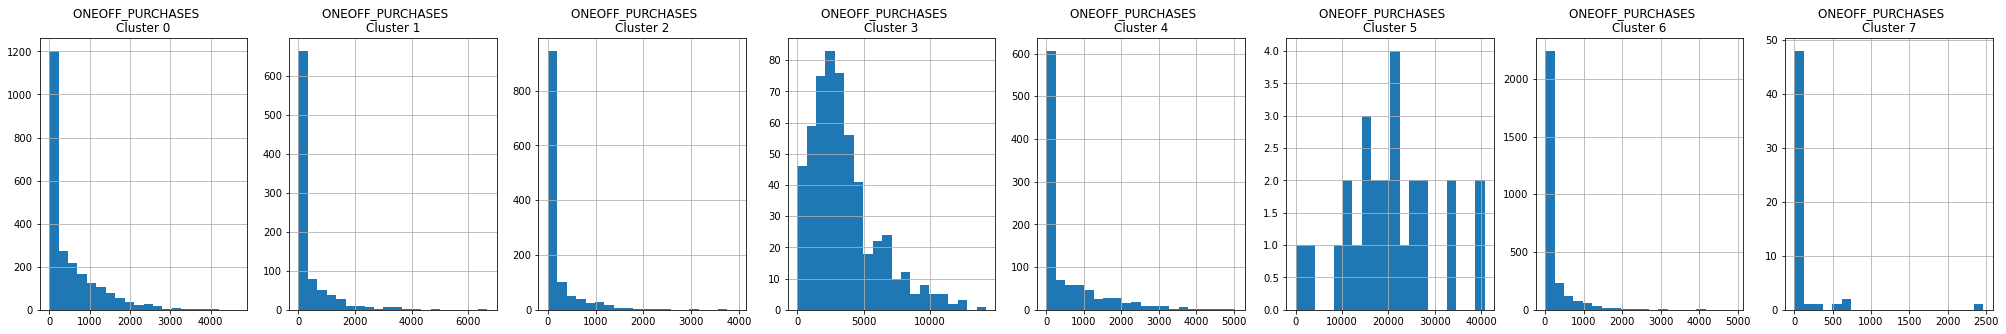

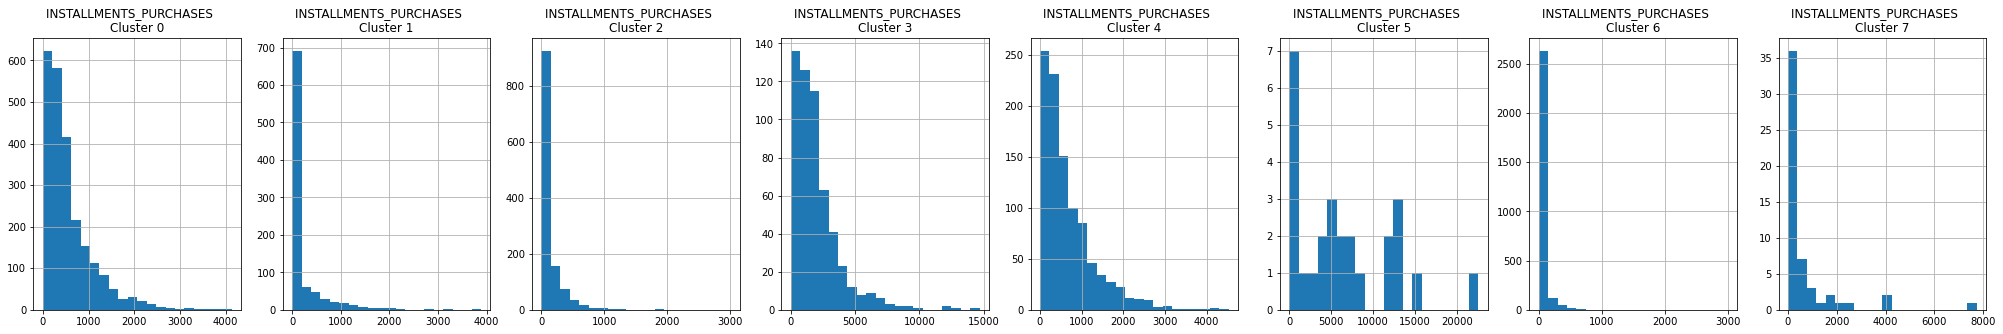

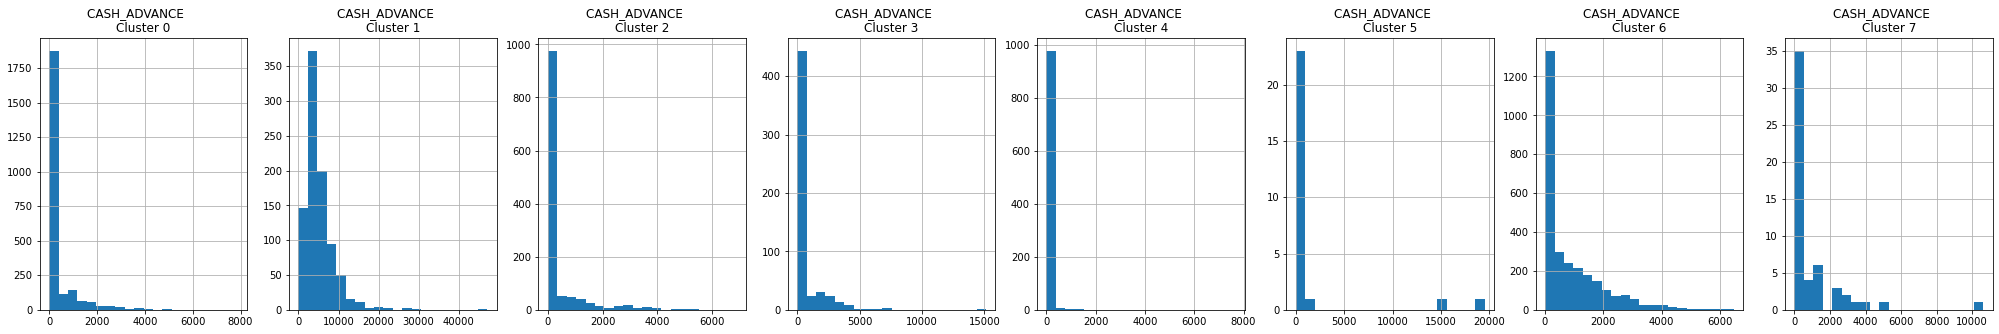

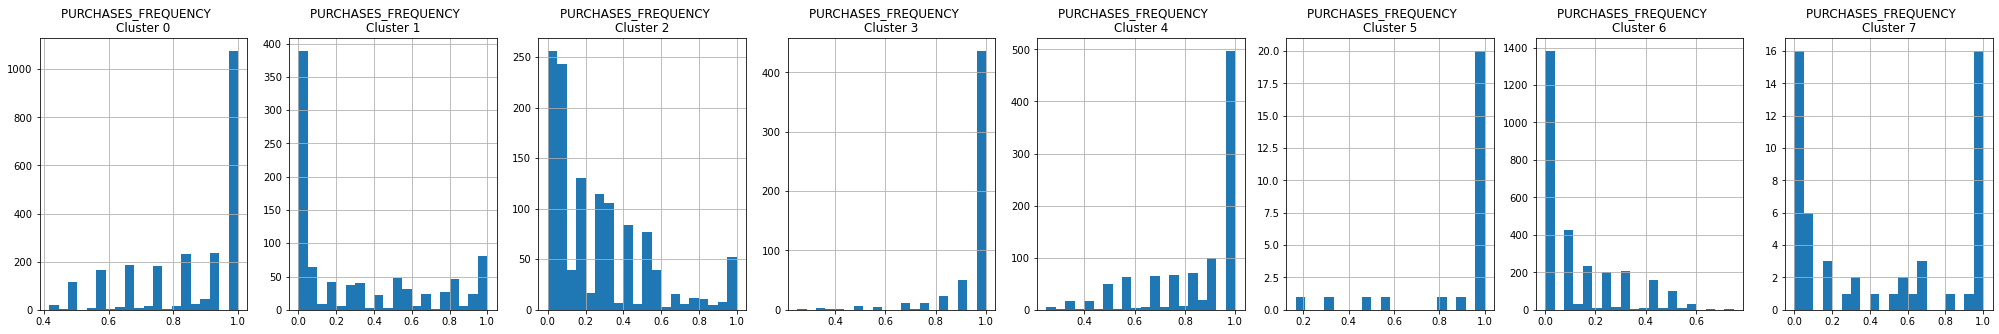

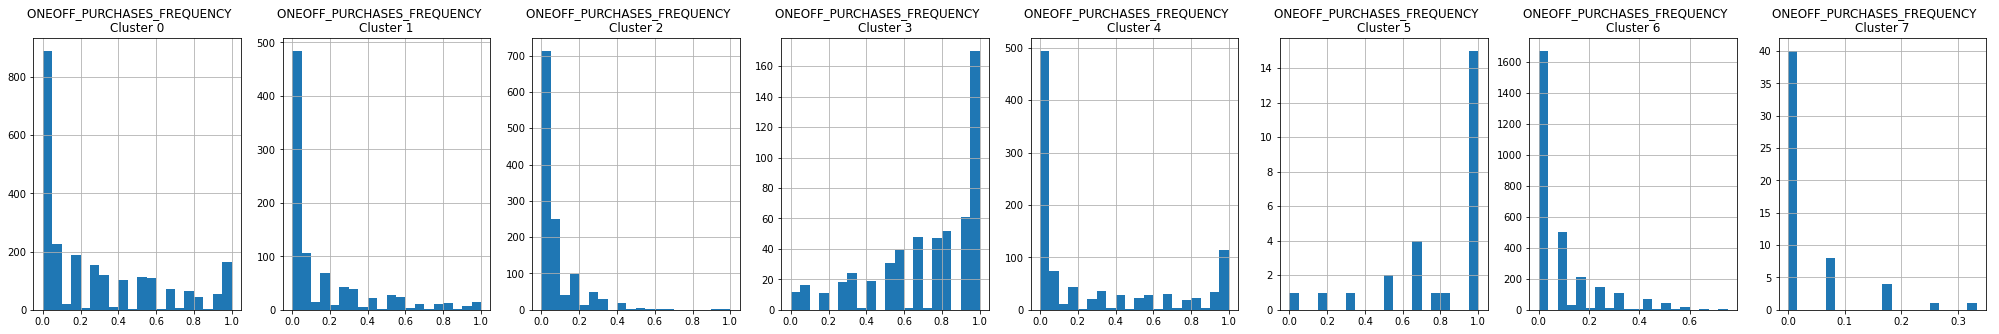

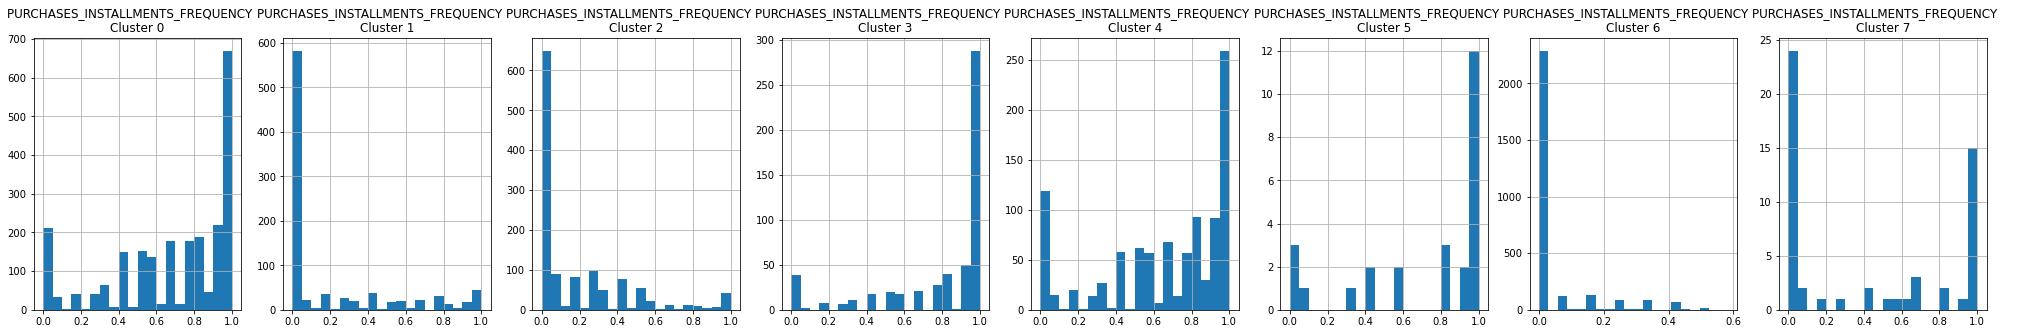

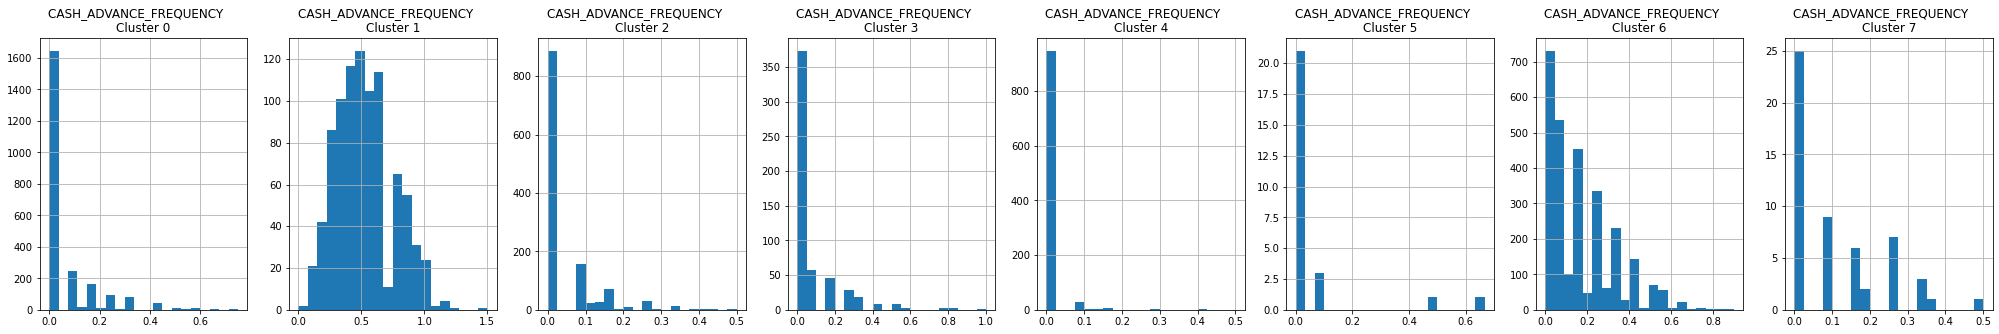

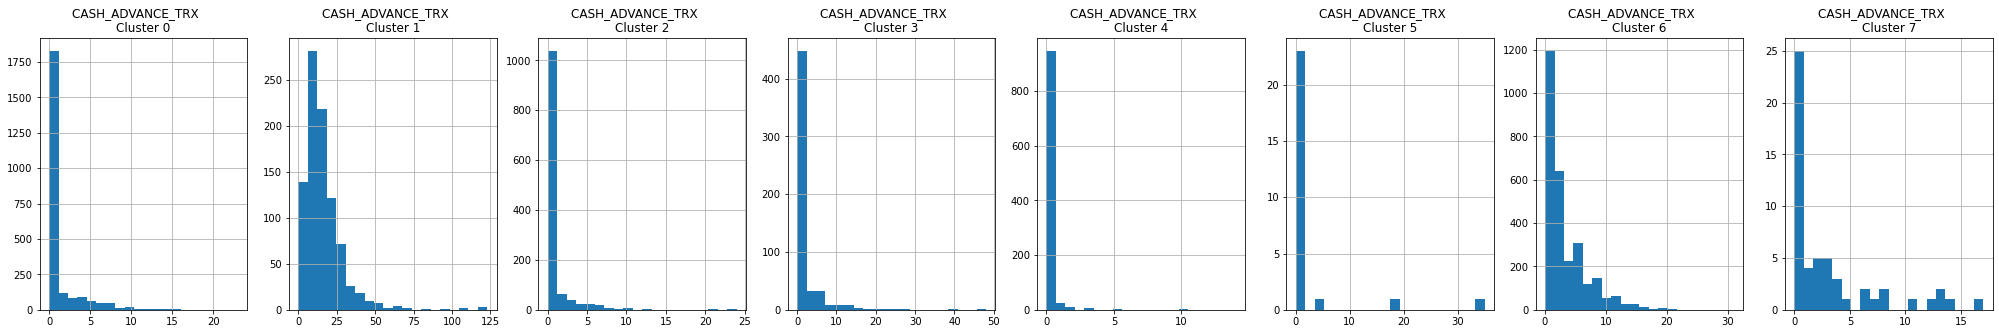

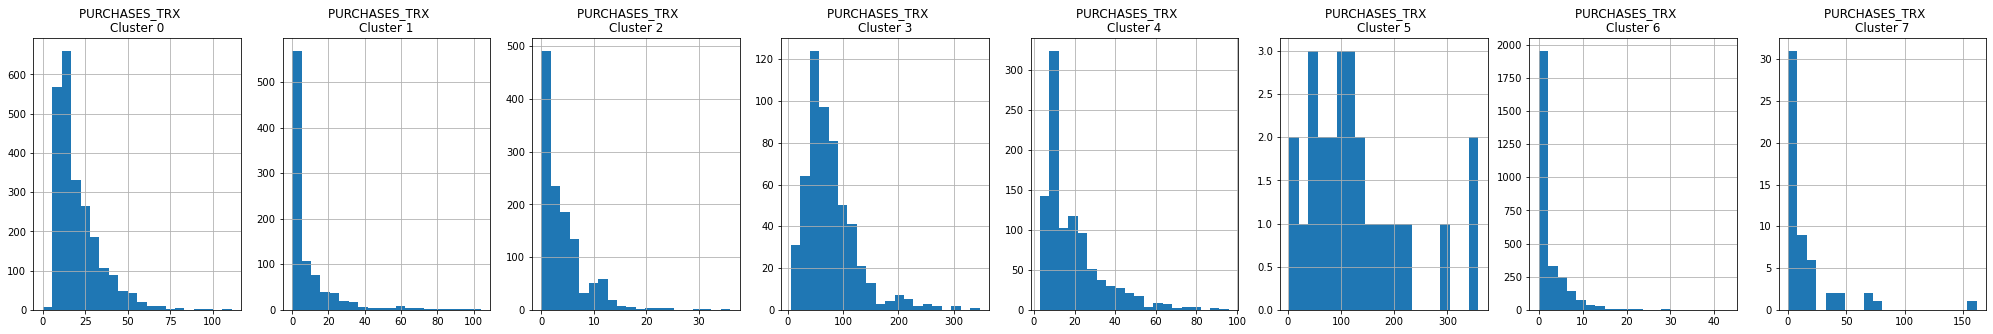

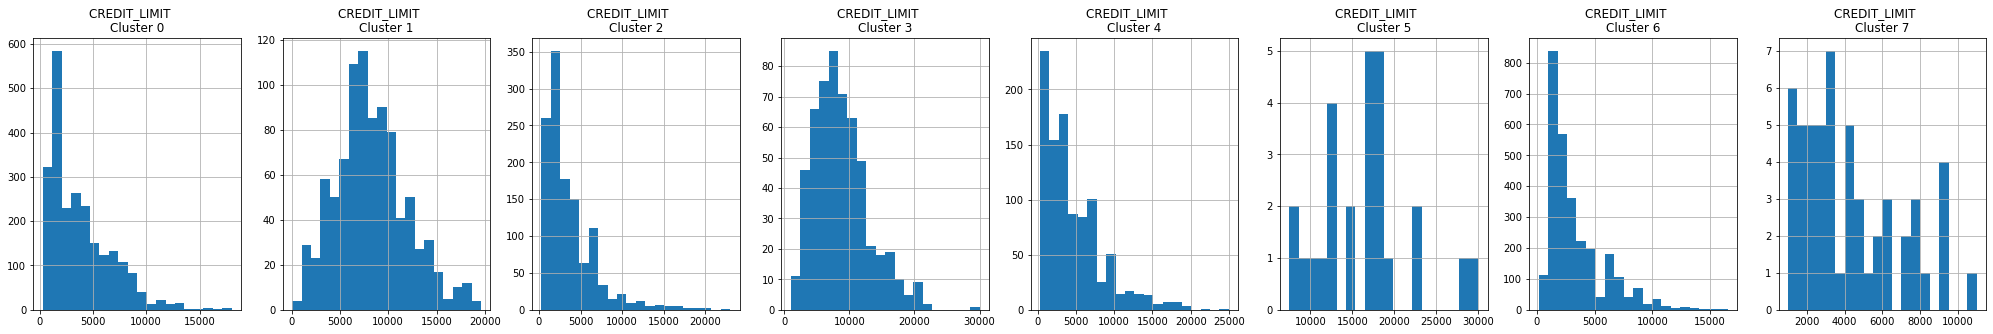

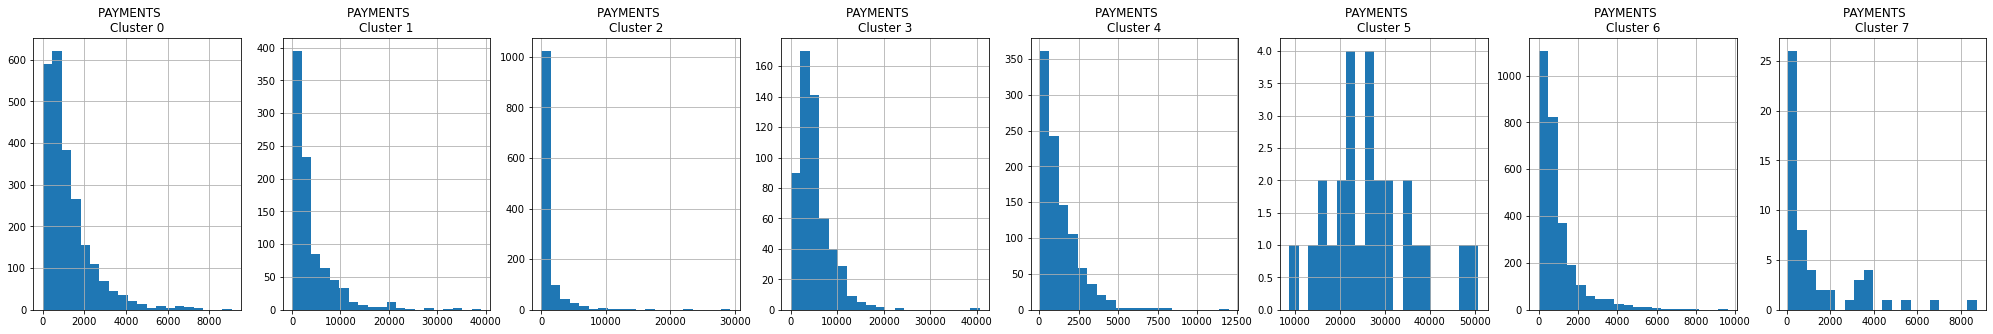

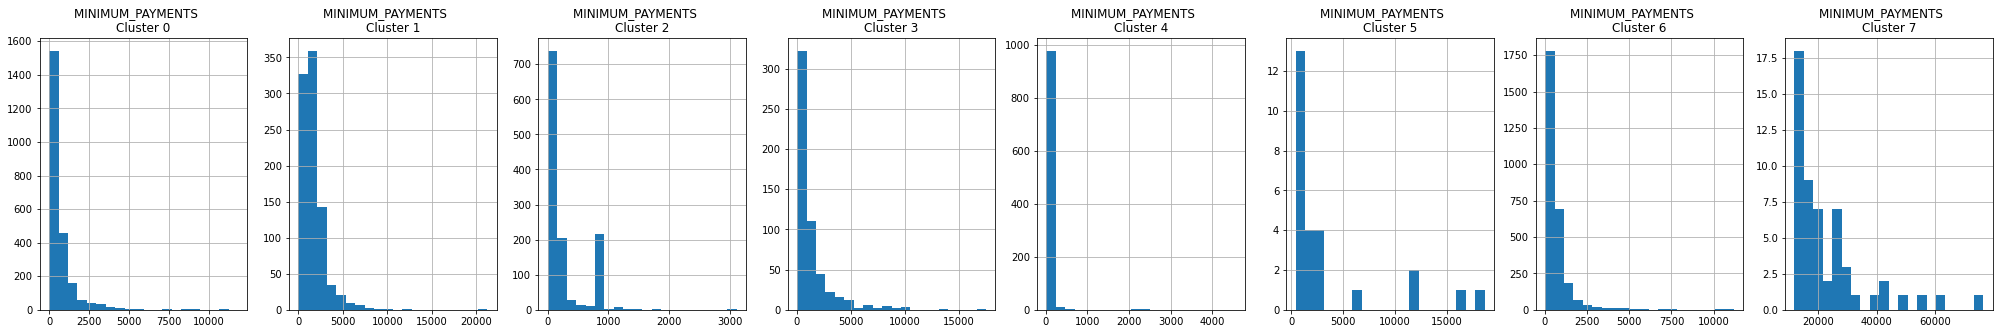

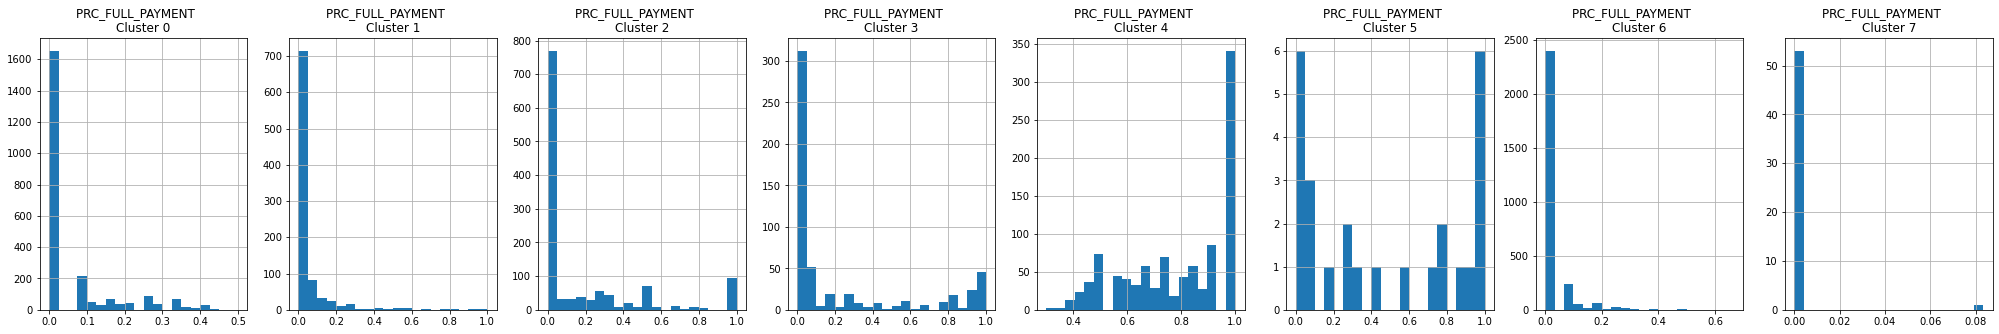

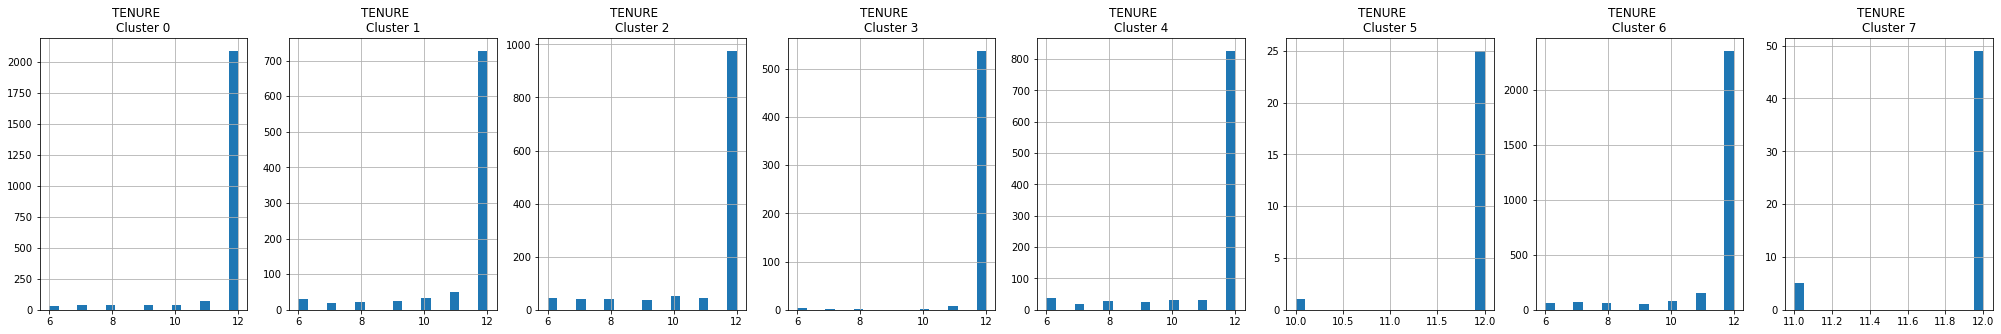

In [33]:
# Visualizamos histogramas para cada cluster 
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS

In [34]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221994, -1.07645282],
       [-1.13829625,  2.5064655 ],
       [ 0.96968041, -0.38352066],
       ...,
       [-0.92620227, -1.81078316],
       [-2.3365494 , -0.65796128],
       [-0.55642325, -0.40046147]])

In [35]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()


,pca1,pca2
0,-1.682220,-1.076453
1,-1.138296,2.506466
2,0.969680,-0.383521
3,-0.873627,0.043160
4,-1.599434,-0.688581


In [36]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,6
1,-1.138296,2.506466,1
2,0.969680,-0.383521,0
3,-0.873627,0.043160,6
4,-1.599434,-0.688581,6


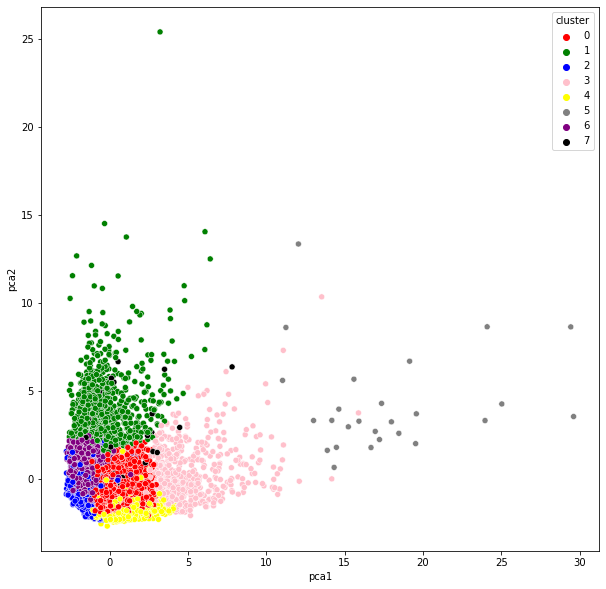

In [37]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()



 TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [57]:
from tensorflow.keras.optimizers import SGD


In [58]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [59]:
creditcard_df_scaled.shape

(8950, 17)

In [60]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [61]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 2s 19ms/step - loss: 0.6302
Epoch 2/25
70/70 [==============================] - 1s 19ms/step - loss: 0.3512
Epoch 3/25
70/70 [==============================] - 2s 22ms/step - loss: 0.2775
Epoch 4/25
70/70 [==============================] - 2s 23ms/step - loss: 0.2168
Epoch 5/25
70/70 [==============================] - 2s 22ms/step - loss: 0.1952
Epoch 6/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1770
Epoch 7/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1603
Epoch 8/25
70/70 [==============================] - 1s 21ms/step - loss: 0.1529
Epoch 9/25
70/70 [==============================] - 1s 18ms/step - loss: 0.1466
Epoch 10/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1404
Epoch 11/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1358
Epoch 12/25
70/70 [==============================] - 1s 17ms/step - loss: 0.1342
Epoch 13/25
70/70 [==================

In [62]:
autoencoder.save_weights('autoencoder.h5')

In [63]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape

(8950, 10)

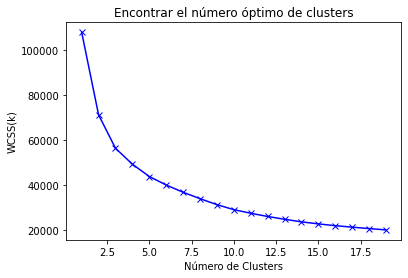

In [64]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

C:\Users\basti\AppData\Local\Temp/ipykernel_8048/3032933116.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_values, scores_1, 'bx-', color = "r")
C:\Users\basti\AppData\Local\Temp/ipykernel_8048/3032933116.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_values, scores_2, 'bx-', color = "g")


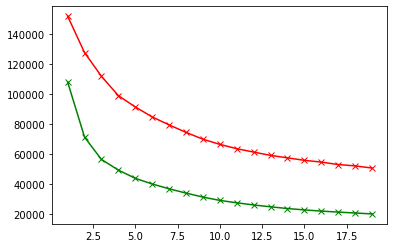

In [65]:
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")


In [66]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [67]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [68]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-2.500237,0.000619
1,1.790106,-2.510738
2,-0.496039,0.849806
3,-1.260127,-0.763122
4,-2.389300,0.030157


In [69]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-2.500237,0.000619,2
1,1.790106,-2.510738,3
2,-0.496039,0.849806,2
3,-1.260127,-0.763122,2
4,-2.389300,0.030157,2
...,...,...,...
8945,1.801777,0.656524,0
8946,1.085418,0.149823,0
8947,1.339765,0.062773,0
8948,0.923582,-1.410313,3


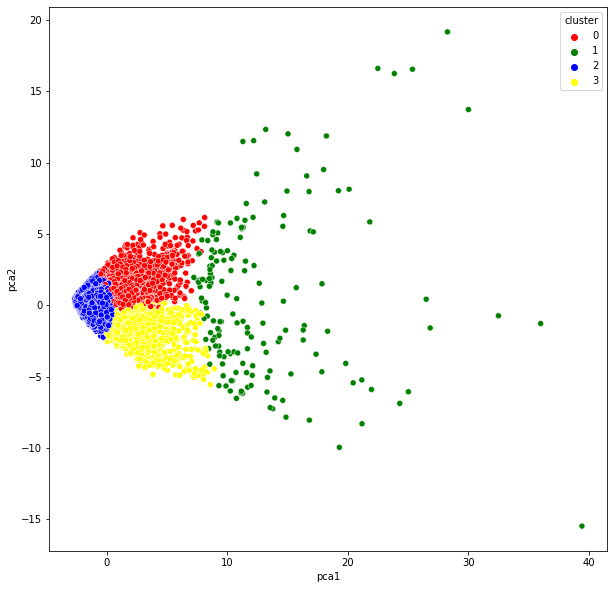

In [70]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()